<a href="https://colab.research.google.com/github/tomasz-soltysiak/NLP_IndianLanguage/blob/master/NLP_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.patches as mpatches
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score,roc_curve,confusion_matrix,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer


In [33]:
df1_movie_reviews=pd.read_csv('/content/tamil_movie_reviews_train.csv',delimiter=',')
df1_movie_reviews.head()

,ReviewId,ReviewInTamil,Rating
0,408,"தமிழ் சினிமாவில் ஒரு சிலர் மட்டுமே பணம், பிஸின...",4.00
1,107,கரு : சினிமா படப்பிடிப்புகளில் வெளிச்சம் பாய்ச...,2.00
2,319,தமிழ் சினிமாவில் தற்போது நாயகர்களுக்கு இணையாக ...,3.25
3,484,உலக அளவில் அனைத்து தரப்பினரையும் தன் நடிப்பால்...,2.25
4,204,"கரு : வில்லனின் கையாள் , வில்லன் செய்த நம்பிக்...",3.00


Let's see simple features of rating.

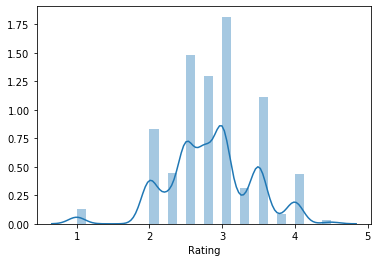

In [34]:
rate=df1_movie_reviews['Rating']
sns.distplot(rate)

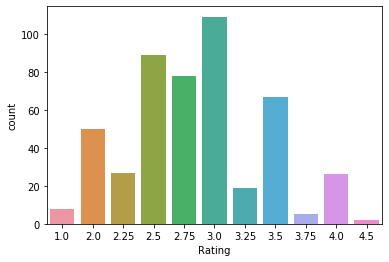

In [35]:
sns.countplot(rate)

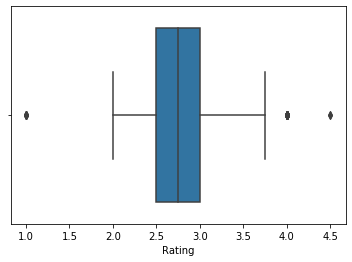

In [36]:
sns.boxplot(rate)

Then focus on NLP.

In [0]:
opinion=df1_movie_reviews['ReviewInTamil']
opinion=list(opinion)


Let's start having some tasks with text.

In [0]:
#Let's start with word steeming
from nltk.stem.porter import PorterStemmer

porter=PorterStemmer()
opinion=[porter.stem(word) for word in opinion]




In [0]:
# W will remove whole punctuation
import unicodedata,sys

punctuation=dict.fromkeys(i for i in range(sys.maxunicode) if unicodedata.category(chr(i)).startswith('P'))
opinion=[o.translate(punctuation) for o in opinion]

Let's encode words in our list.

No I am gonna create df2 with encoded text

In [59]:
df2=df1_movie_reviews
df2['ReviewInTamil']=opinion
df2.head()

,ReviewId,ReviewInTamil,Rating,coding
0,408,தமிழ் சினிமாவில் ஒரு சிலர் மட்டுமே பணம் பிஸினஸ...,4.00,1
1,107,கரு சினிமா படப்பிடிப்புகளில் வெளிச்சம் பாய்ச்...,2.00,0
2,319,தமிழ் சினிமாவில் தற்போது நாயகர்களுக்கு இணையாக ...,3.25,0
3,484,உலக அளவில் அனைத்து தரப்பினரையும் தன் நடிப்பால்...,2.25,0
4,204,கரு வில்லனின் கையாள் வில்லன் செய்த நம்பிக்கை...,3.00,0


In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 4 columns):
ReviewId         480 non-null int64
ReviewInTamil    480 non-null object
Rating           480 non-null float64
coding           480 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 15.1+ KB


In [0]:
#df2.to_csv('Tamil_movie_reviews_train2.csv')